# OYO Data Analysis

In [52]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

### Import the cleaned OYO dataset

In [53]:
oyo_df = pd.read_csv('datasets/oyo_hotels_cleaned.csv')
oyo_df

,Country,City,Hotel Name,Address,Rating,No Of Ratings,Rating Summary,Amenities,Room Type,Final Price,Slashed Price,Discount(%)
0,India,Agra,OYO 44134 Hotel Radhika Resort,"Agra Bypass, Fatehpur Sikri Road, Agra",4.5,14.0,Excellent,Basic Amenities,NaN,875.00,₹1283,32% off
1,India,Agra,OYO 30716 Anand Residency,"Near Maruti Estate, Shahganj, Agra",4.4,81.0,Very,"First Aid, Attached Bathroom, Daily Housekeepi...",NaN,868.00,₹1273,32% off
2,India,Agra,SPOT ON 18746 Shree Inn SPOT,"Beside Mansingh Palace, Tajganj, Agra",3.8,141.0,Good,"Parking Facility, Card Payment, Power backup, ...",NaN,452.00,₹663,32% off
3,India,Agra,SPOT ON 63500 Taj Premium Home Stay,A12 2nd floor parasvnath prerna opposite Court...,4.3,10.0,Very,Basic Amenities,NaN,815.00,₹1195,32% off
4,India,Agra,OYO 60827 The Agra House by Ruby HS,"Fatehabad Road, Agra",3.1,13.0,Fair,"Parking Facility, AC, TV, + 4 more",NaN,875.00,₹1283,32% off
...,...,...,...,...,...,...,...,...,...,...,...,...
12736,UAE,Dubai,OYO 379 Home Villa E62,"The Palm Jumeirah Dubai Fond E, Dubai",0.0,NaN,NEW,"Daily Housekeeping, Swimming Pool, Toaster, + ...",Classic (2X),38865.06,AED2802,29% off
12737,UAE,Dubai,OYO 374 Home Villa E 64,"The Palm Jumeirah Dubai Fond E, Dubai",0.0,NaN,NEW,"Daily Housekeeping, Swimming Pool, Toaster, + ...",Classic (2X),38865.06,AED2802,29% off
12738,UAE,Dubai,OYO 180 Evin Hotel,"Near Baniyas Square MS, Dubai",4.0,84.0,Very,"AC, Refrigerator, Power backup, + 3 more",Standard Double - Twin,58620.00,AED4225,29% off
12739,UAE,Dubai,OYO 321 Home Qasr Sabah,"Dubai - United Arab Emirates, Dubai",0.0,NaN,NEW,"First Aid, Buzzer/Door Bell, Attached Bathroom...",Classic (2X),5275.80,AED380,29% off


# 1. Univariate Analysis

### 1.1 Total  number of countries in which OYO expanded its business

In [54]:
countries = oyo_df.Country.unique()
print('Total Number of Countries: ', len(countries))
print('Countries:', countries)

Total Number of Countries:  5
Countries: ['India' 'Nepal' 'Malaysia' 'Indonesia' 'UAE']


### 1.2 Total number of cities that OYO expanded its business world wide 

In [55]:
print('Total Number of Cities world wide:', len(oyo_df.City.unique()))

Total Number of Cities world wide: 162


### 1.3 OYO's country wide business expansion percentage

In [121]:
n_hotels_total = len(oyo_df)
country_hotels = oyo_df.Country..value_counts()
# print(country_hotels)
# print(country_hotels.index)
# print(country_hotels['Nepal'])
# print(country_hotels.values)
# #for index in country_hotels.index:
#    print(f'{index} = {country_hotels[index] / n_hotels_total * 100 :0.2f} %')
country_percentages = { index:round(country_hotels[index] / n_hotels_total * 100, 2) for index in country_hotels.index }
country_percentages

{'India': 88.64,
 'Indonesia': 7.07,
 'Malaysia': 2.1,
 'Nepal': 1.26,
 'UAE': 0.93}

### 1.4 Plotting a Bar Chart for OYO Business Expansion in Various Countries

In [6]:
countries = list(country_percentages.keys())
percentages = list(country_percentages.values())

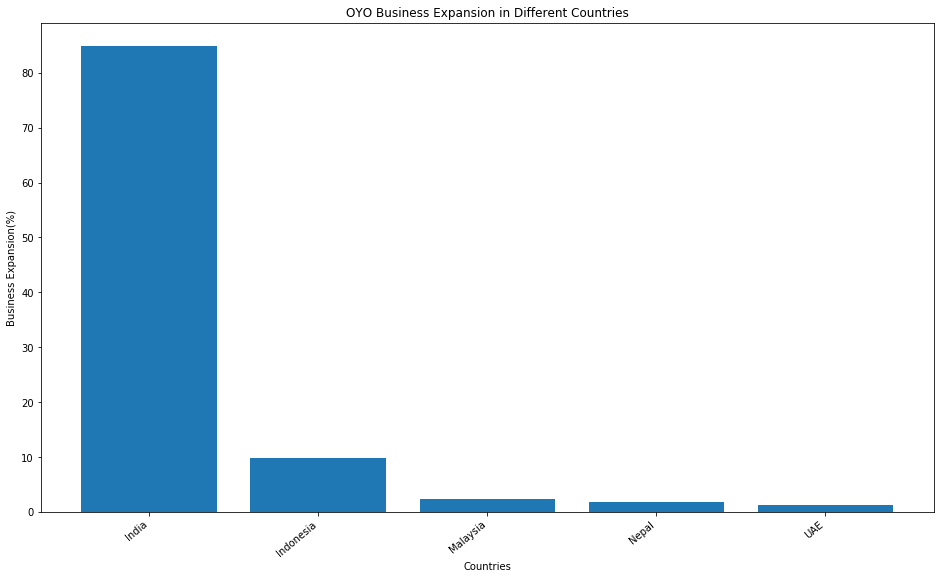

In [7]:
fig, ax = plt.subplots(figsize = (16, 9))
ax.bar(countries, percentages)
xlabels = ax.get_xticklabels()
plt.style.use('seaborn-bright')
plt.setp(xlabels, rotation=40, horizontalalignment='right')
ax.set(xlabel = "Countries", ylabel = 'Business Expansion(%)', title = 'OYO Business Expansion in Different Countries')
plt.show()

### 1.5 PIE chart for OYO Business Expansion in Various Countries

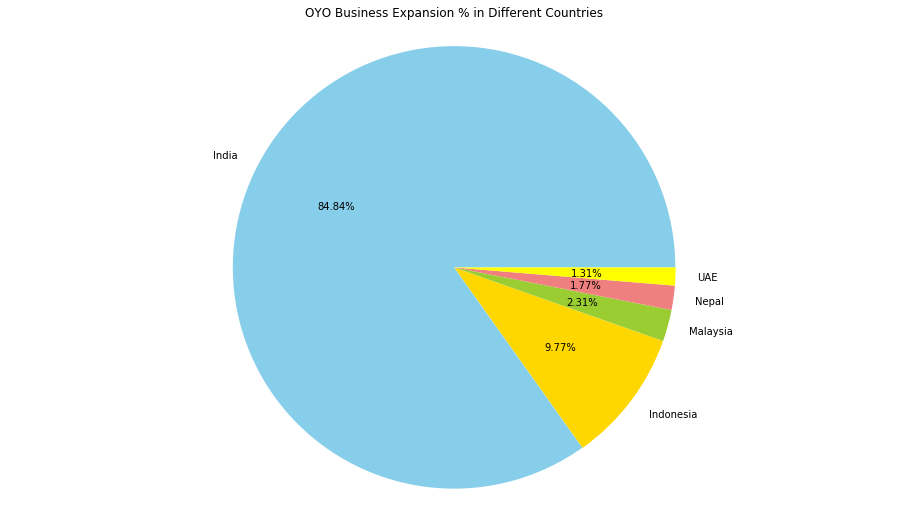

In [8]:
f, ax = plt.subplots(figsize = (16, 9))
colors = ['skyblue', 'gold', 'yellowgreen', 'lightcoral', 'yellow']
ax.pie(percentages, radius = 1.3, labels = countries, autopct = '%0.2f%%', colors = colors, explode = [0.001] * 5 )
plt.axis('equal')
plt.title('OYO Business Expansion % in Different Countries')
plt.show()

### Observation

OYO has around 84% percent of its business happening in India. It is obvious that OYO has 84% its overall business happening in India because it is Indian Originated Business. Since it is Indian Originated it has its base strong in India.

### 1.6 Donut Plot for OYO Business Expansion in Various Countries excluding `India`

In [122]:
countries = oyo_df[(oyo_df.Country != 'India')].Country
country_labels = np.array(countries.value_counts().index)
country_values = np.array(countries.value_counts())


print('Country Lables: ', country_labels)
print('Country Values: ', country_values)

Country Lables:  ['Indonesia' 'Malaysia' 'Nepal' 'UAE']
Country Values:  [901 268 160 118]


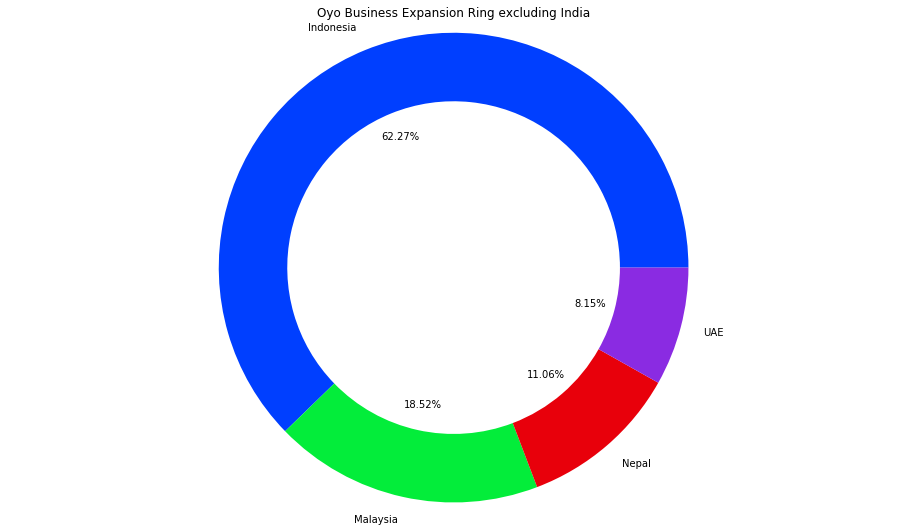

In [126]:
fig, ax = plt.subplots(figsize = (16, 9))
ax.axis('equal')

outerring, _, __ = ax.pie(country_values, radius=1.2, labels=country_labels, autopct = '%0.2f%%')
plt.setp(outerring, width = 0.35)
plt.title("Oyo Business Expansion Ring excluding India")

# print(type(outerring))
# innerring, _ = ax.pie(city_counts, radius = 1.2 - 0.2, labels = city_labels)
# plt.setp(innerring, width = 0.2, edgecolor = 'white')

plt.show()

# 2.  Bivariate Analysis

### 2.1 Find the city in Nepal that has more Oyo Hotels

In [11]:
oyo_df[oyo_df.Country == 'Nepal'].City.value_counts().index[0]

'Kathmandu'

### 2.1.1 What is the count of Hotels where Nepal has more Oyo Hotels ?

In [12]:
oyo_df[oyo_df.Country == 'Nepal'].City.value_counts()[0]

116

### 2.1.2 Print the City in Nepal that has more Oyo Hotels and its Count

In [13]:
nepal_counts = oyo_df[oyo_df.Country == 'Nepal'].City.value_counts()
print(f'{nepal_counts.index[0]} = {nepal_counts[0]}') 

Kathmandu = 116


In [14]:
print(oyo_df.columns)

Index(['Country', 'City', 'Hotel Name', 'Address', 'Rating', 'No Of Ratings',
       'Rating Summary', 'Amenities', 'Room Type', 'Final Price',
       'Slashed Price', 'Discount(%)'],
      dtype='object')


### 2.2 Bring up all the cities that OYO has hotels in India

In [15]:
cities_in_india = oyo_df[oyo_df.Country == 'India'].City.unique()
print('Total Number of Cities OYO Covers in India:', len(cities_in_india))
print('\nCities:', cities_in_india)

Total Number of Cities OYO Covers in India: 129

Cities: ['Agra' 'Ahmedabad' 'Alappuzha' 'Alibag' 'Alwar' 'Ambala' 'Amritsar'
 'Aurangabad' 'Bangalore' 'Bareilly' 'Bhopal' 'Bhubaneswar' 'Bikaner'
 'Bodhgaya' 'Calicut' 'Chandigarh' 'Chennai' 'Chittorgarh' 'Coimbatore'
 'Coorg' 'Corbett-Ramnagar' 'Cuttack' 'Dalhousie' 'Darjeeling' 'Dehradun'
 'Delhi' 'Dhanbad' 'Dharamshala' 'Digha' 'Durgapur' 'Faridabad' 'Gangtok'
 'Ghaziabad' 'Goa' 'Gurgaon' 'Guwahati' 'Gwalior' 'Haldwani' 'Hamirpur'
 'Haridwar' 'Hisar' 'Hyderabad' 'Indore' 'Jabalpur' 'Jaipur' 'Jaisalmer'
 'Jalandhar' 'Jammu' 'Jamshedpur' 'Jodhpur' 'Joshimath' 'Kanpur' 'Kasauli'
 'Kasol' 'Katra' 'Khajuraho' 'Kochi' 'Kolkata' 'Kota' 'Kullu'
 'Kurukshetra' 'Latagudi' 'Lonavala' 'Lucknow' 'Ludhiana' 'Madurai'
 'Mahabaleshwar' 'Manali' 'Mandi' 'Mangalore' 'Mathura' 'Mayapur'
 'Mcleod-Ganj' 'Meerut' 'Mohali' 'Mount-Abu' 'Mumbai' 'Munnar' 'Mussoorie'
 'Mysore' 'Nagpur' 'Nainital' 'Nashik' 'Nayagaon' 'Noida' 'Ooty'
 'Panchkula' 'Panipat' 'Pati

### 2.3 What are the best hotels in Manali ?

In [16]:
oyo_df[(oyo_df.City == 'Manali') & (oyo_df.Rating > 4.5) & (oyo_df['No Of Ratings'] >= 100) ].sort_values('No Of Ratings', ascending = False)

,Country,City,Hotel Name,Address,Rating,No Of Ratings,Rating Summary,Amenities,Room Type,Final Price,Slashed Price,Discount(%)
4710,India,Manali,OYO 7766 Hotel Thakur,"Near Circuit House, Manali",4.6,171,Excellent,"Parking Facility, TV, CCTV Cameras, + 3 more",NaN,832.0,1529.0,46
4551,India,Manali,OYO Home 16776 Luxurious Studio,"Near Chichoga Rd, Aleo, Manali",4.6,135,Excellent,"Parking Facility, In-house Restaurant, TV, + 2...",NaN,868.0,1273.0,32


### 2.4 Plot the no of hotels' Distribution of cities in Indonesia

In [17]:
india_sample_df = oyo_df[oyo_df.Country == 'Indonesia']
city_counts = india_sample_df.City.value_counts(sort = False)
cities = list(city_counts.index)
counts = list(city_counts)
city_counts

Balikpapan       3
Probolinggo      7
Malang          54
Solo            11
Semarang        26
Bekasi           2
Surabaya        75
Medan           89
Makassar        34
Sukabumi         3
Jakarta        124
Padang          10
Palembang       50
Pekanbaru       17
Banyuwangi      23
Bali            74
Bandung         72
Manado          11
Yogyakarta     178
Batam            6
Batu            12
Name: City, dtype: int64

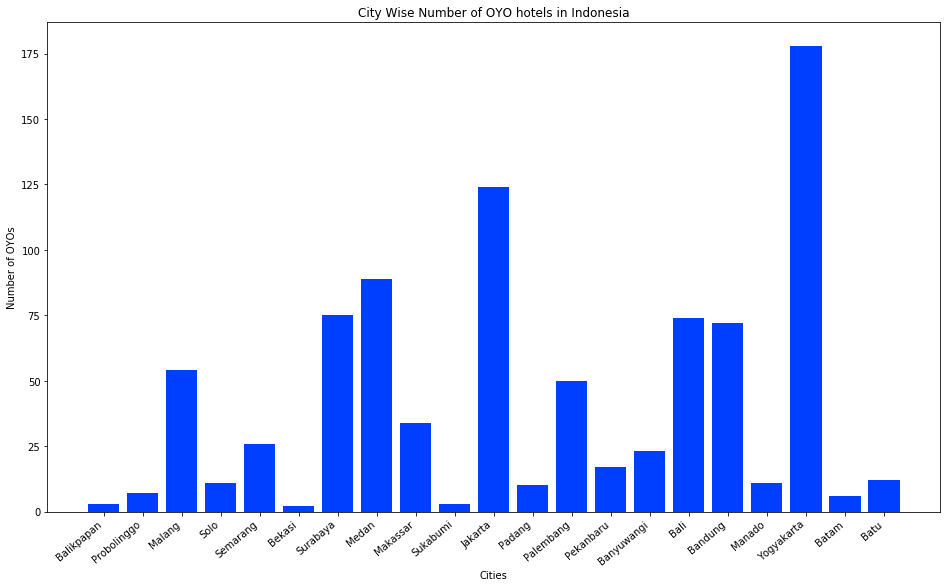

In [18]:
fig, ax = plt.subplots(figsize = (16, 9))
ax.bar(cities, counts)
xlabels = ax.get_xticklabels()
plt.style.use('seaborn-bright')
plt.setp(xlabels, rotation=40, horizontalalignment='right')
ax.set(xlabel = "Cities", ylabel = 'Number of OYOs', title = 'City Wise Number of OYO hotels in Indonesia')
plt.show()

### 2.5 `Side-by-Side` bar plot for OYO Business Expansion and its revenue from each Country

In [70]:
country_revenues = []
n_hotels_in_country = []

countries = oyo_df.Country.unique().tolist()
print('Countries: ', countries)

for country in countries:
    country_revenues.append((oyo_df[oyo_df.Country == country]['Final Price'].sum()) * 0.25) # Take 25 % percent
    n_hotels_in_country.append(len(oyo_df[oyo_df.Country == country]))

print("Revenue From Each Country: ", country_revenues)
print("No of Hotels From Each Country", n_hotels_in_country)

Countries:  ['India', 'Nepal', 'Malaysia', 'Indonesia', 'UAE']
Revenue From Each Country:  [3551110.5, 39190.725000000006, 101008.04999999999, 373606.76604499994, 346209.7200000001]
No of Hotels From Each Country [11294, 160, 268, 901, 118]


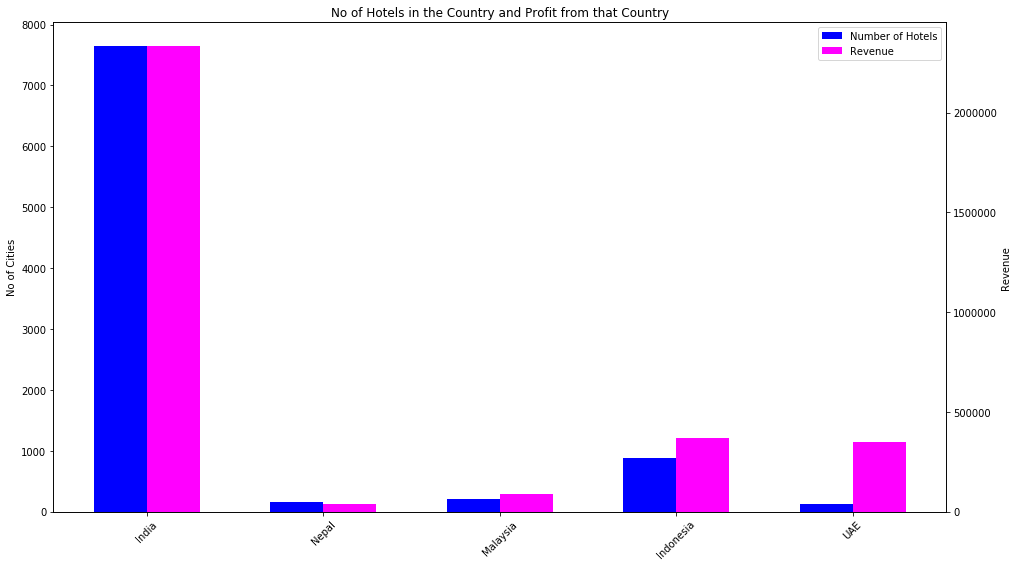

In [20]:
x = np.arange(len(countries))  # the label locations
width = 0.3  # the width of the bars

# We need to create subplots in order to overlay two bar plots
# with proper axes on the left hand side and the right hand side
fig, ax = plt.subplots(figsize = (16, 9))

plt.xticks(x, countries, rotation='45')
n_hotels_bars = ax.bar(x -  width / 2, n_hotels_in_country, width, color = 'blue' )
plt.ylabel('No of Cities')

# ax.twinx() gives us the same x-axis with the y-axis on the right.
ax = ax.twinx()
revenue_bars = ax.bar(x + width / 2, country_revenues, width, label = 'Revenue', color = 'magenta')
plt.ylabel('Revenue')

plt.legend([n_hotels_bars, revenue_bars], ['Number of Hotels', 'Revenue'])
plt.title('No of Hotels in the Country and Profit from that Country')
plt.show()

> Since India is creating bias lets remove India from the figure.

In [21]:
country_revenues = []
n_hotels_in_country = []

countries = oyo_df.Country.unique().tolist()
countries.remove('India')
print('Countries: ', countries)

for country in countries:
    country_revenues.append((oyo_df[oyo_df.Country == country]['Final Price'].sum()) * 0.25) # Take 25 % percent
    n_hotels_in_country.append(len(oyo_df[oyo_df.Country == country]))
print("Revenue From Each Country: ", country_revenues)
print("No of Cities From Each Country", n_hotels_in_country)

Countries:  ['Nepal', 'Malaysia', 'Indonesia', 'UAE']
Revenue From Each Country:  [39190.725000000006, 87250.02, 371082.375455, 346209.7200000001]
No of Cities From Each Country [160, 208, 881, 118]


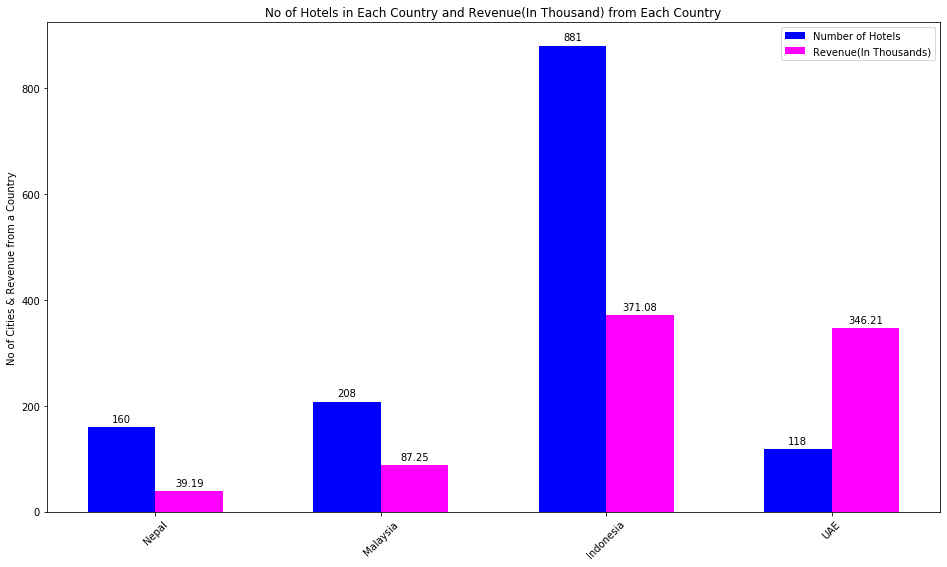

In [22]:
x = np.arange(len(countries))  # the label locations
width = 0.3  # the width of the bars

country_revenues_in_1000s = [ round(x / 1000, 2) for x in country_revenues]
# We need to create subplots in order to overlay two bar plots
# with proper axes on the left hand side and the right hand side
fig, ax = plt.subplots(figsize = (16, 9))


plt.xticks(x, countries, rotation='45')

n_hotels_bars = ax.bar(x -  width / 2, n_hotels_in_country, width, color = 'blue' )
revenue_bars = ax.bar(x + width / 2, country_revenues_in_1000s, width, color = 'magenta')

plt.ylabel('No of Cities & Revenue from a Country')

plt.legend([n_hotels_bars, revenue_bars], ['Number of Hotels', 'Revenue(In Thousands)'])

def auto_label(bars):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

auto_label(n_hotels_bars)
auto_label(revenue_bars)

plt.title('No of Hotels in Each Country and Revenue(In Thousand) from Each Country')
plt.show()

## 2.6 Analyze India's Data

### 2.6.1 Total number of cities in India

In [23]:
data_india = oyo_df[oyo_df.Country == 'India']
print(f'Total Number of Cities that OYO Hotels available: {len(data_india.City.unique())}')

Total Number of Cities that OYO Hotels available: 129


In [24]:
data_india

,Country,City,Hotel Name,Address,Rating,No Of Ratings,Rating Summary,Amenities,Room Type,Final Price,Slashed Price,Discount(%)
0,India,Agra,OYO 44134 Hotel Radhika Resort,"Agra Bypass, Fatehpur Sikri Road, Agra",4.5,14,Excellent,Basic Amenities,NaN,875.0,1283.0,32
1,India,Agra,OYO 30716 Anand Residency,"Near Maruti Estate, Shahganj, Agra",4.4,81,Very,"First Aid, Attached Bathroom, Daily Housekeepi...",NaN,868.0,1273.0,32
2,India,Agra,SPOT ON 18746 Shree Inn SPOT,"Beside Mansingh Palace, Tajganj, Agra",3.8,141,Good,"Parking Facility, Card Payment, Power backup, ...",NaN,452.0,663.0,32
3,India,Agra,SPOT ON 63500 Taj Premium Home Stay,A12 2nd floor parasvnath prerna opposite Court...,4.3,10,Very,Basic Amenities,NaN,815.0,1195.0,32
4,India,Agra,OYO 60827 The Agra House by Ruby HS,"Fatehabad Road, Agra",3.1,13,Fair,"Parking Facility, AC, TV, + 4 more",NaN,875.0,1283.0,32
...,...,...,...,...,...,...,...,...,...,...,...,...
7649,India,Zirakpur,OYO 9159 Hotel Royal Woodslark,"Chandigarh Road, Zirakpur",3.0,1,Fair,"Parking Facility, Kitchen, CCTV Cameras, + 6 more",NaN,781.0,1915.0,59
7650,India,Zirakpur,Capital O 3864 Master Farm,"Zirakpur, Chandigarh",4.1,201,Very,"Parking Facility, Kitchen, In-house Restaurant...",NaN,1378.0,2021.0,32
7651,India,Zirakpur,OYO 18747 Pee Kay Royal,"Near Bus Stand, Zirakpur",4.5,33,Excellent,"Kitchen, CCTV Cameras, Geyser, + 5 more",NaN,1212.0,1821.0,33
7652,India,Zirakpur,OYO 12967 Hotel Simran,"Mamta Enclave, Dhakoli, Zirakpur",0.0,0,NEW,"Kitchen, CCTV Cameras, Geyser, + 6 more",NaN,774.0,1321.0,41


### 2.6.2 Excellent & Hotels From India

In [25]:
#Excellent Hotels from India that has got more than 45% discount
exlnt_india_hotels =  data_india[(data_india['Rating Summary'] == 'Excellent') & ( data_india['Discount(%)']  > 45 )]


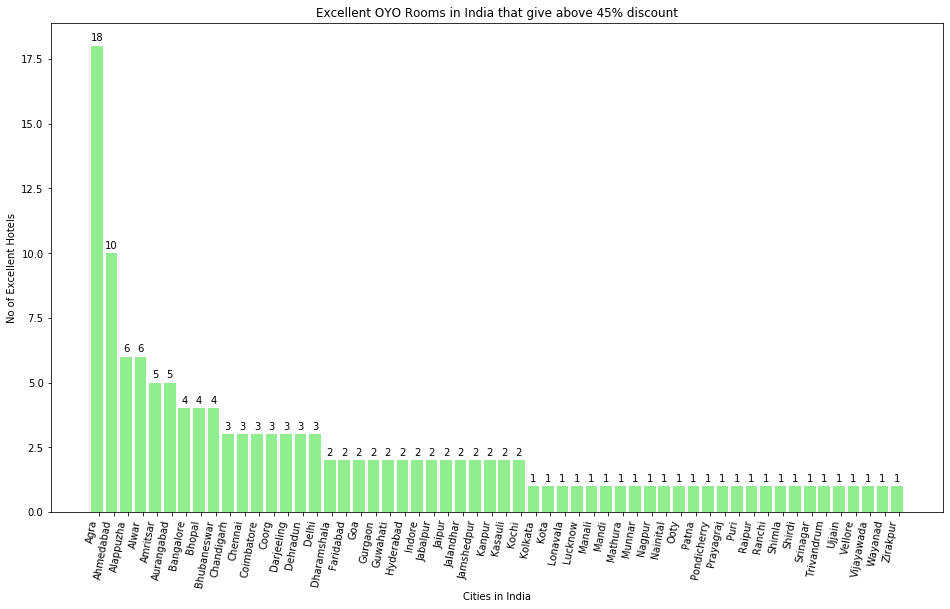

In [30]:
x = np.arange(len(exlnt_india_hotels.City.unique()))
fig, ax = plt.subplots(figsize = (16,9))
bar1 = ax.bar(x - width / 2, exlnt_india_hotels.City.value_counts(), color = 'lightgreen')
plt.xticks(x, exlnt_india_hotels.City.unique(), rotation='80', horizontalalignment='right')
plt.xlabel('Cities in India')
plt.ylabel('No of Excellent Hotels')
plt.title("Excellent OYO Rooms in India that give above 45% discount")
auto_label(bar1)
plt.show()

In [27]:
low_performance_hotels = data_india[(data_india.Rating <= 3) & (data_india.Rating != 0) & (data_india['No Of Ratings'] > 10)].sort_values('City')
low_performance_hotels

,Country,City,Hotel Name,Address,Rating,No Of Ratings,Rating Summary,Amenities,Room Type,Final Price,Slashed Price,Discount(%)
87,India,Agra,Capital O 36085 Hotel Apollo Agra,"Impeypura, Tajganj, Agra",3.0,41,Fair,"Parking Facility, Kitchen, First Aid, + 17 more",NaN,940.0,3517.0,73
118,India,Agra,SPOT ON 49331 Hotel Greenland SPOT,"Near St. Marty's School, Visvakarma Puram, Agra",3.0,18,Fair,Basic Amenities,NaN,536.0,786.0,32
238,India,Ahmedabad,OYO 10129 Hotel Stay Inn,"Near Galaxy Cinema, Naroda, Ahmedabad",3.0,49,Fair,"Parking Facility, Attached Bathroom, Daily Hou...",NaN,885.0,1641.0,46
421,India,Amritsar,OYO 12354 Hotel Sangreela,"City Centre, Amritsar",3.0,22,Fair,"Parking Facility, CCTV Cameras, Geyser, + 4 more",NaN,1339.0,1964.0,32
770,India,Bareilly,OYO 29783 Aggrawal Guest House Saver,"Near Old Bus Station, Bareilly",3.0,24,Fair,"Buzzer/Door Bell, Attached Bathroom, Daily Hou...",NaN,709.0,1039.0,32
1167,India,Chandigarh,OYO 8277 Tricity Relax Inn,"Zirakpur, Chandigarh",3.0,93,Fair,"Parking Facility, Kitchen, CCTV Cameras, + 7 more",NaN,1212.0,1777.0,32
1218,India,Chandigarh,SPOT ON 43673 Hotel New Mehak Palace SPOT,"Near Civil Hospital, Chandigarh",3.0,88,Fair,"Attached Bathroom, Daily Housekeeping, CCTV Ca...",NaN,499.0,731.0,32
1392,India,Chennai,OYO 49128 Beehive Candour Saver,"Near Vivira Mall, Chennai",3.0,128,Fair,"Parking Facility, Attached Bathroom, Daily Hou...",NaN,980.0,1437.0,32
1403,India,Chennai,OYO 44371 Noor Residency,"G.S.T. Road, Guduvancheri, Chennai",3.0,76,Fair,"First Aid, Attached Bathroom, Daily Housekeepi...",NaN,1212.0,1777.0,32
1497,India,Chennai,OYO 29267 Hotel Akash Inn,"Near Chennai Trade Centre Nandambakkam, Chennai",3.0,139,Fair,"First Aid, Daily Housekeeping, Elevator, + 12 ...",NaN,1010.0,2324.0,57


## 3. Box Plot for Prices in Nepal

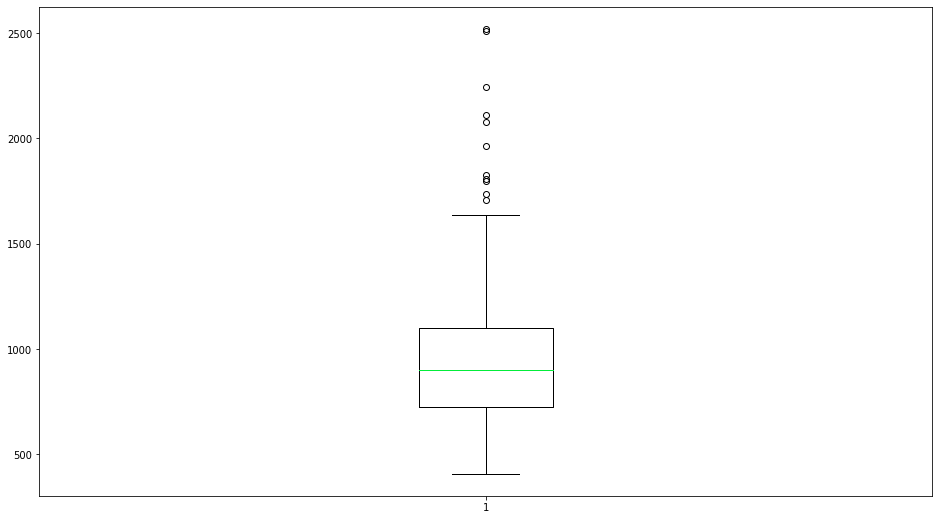

In [115]:
fig, ax = plt.subplots(figsize = (16, 9))
boxplot = ax.boxplot(oyo_df[ oyo_df.Country == 'Nepal']['Final Price'] )
# boxplot = ax.boxplot(oyo_df[oyo_df.Country == 'India']['Final Price'] )
plt.show()

In [116]:
oyo_df[ oyo_df.Country == 'Nepal']['Final Price'].describe()

count     160.000000
mean      979.768125
std       392.594485
min       409.500000
25%       724.500000
50%       902.475000
75%      1101.397500
max      2520.000000
Name: Final Price, dtype: float64

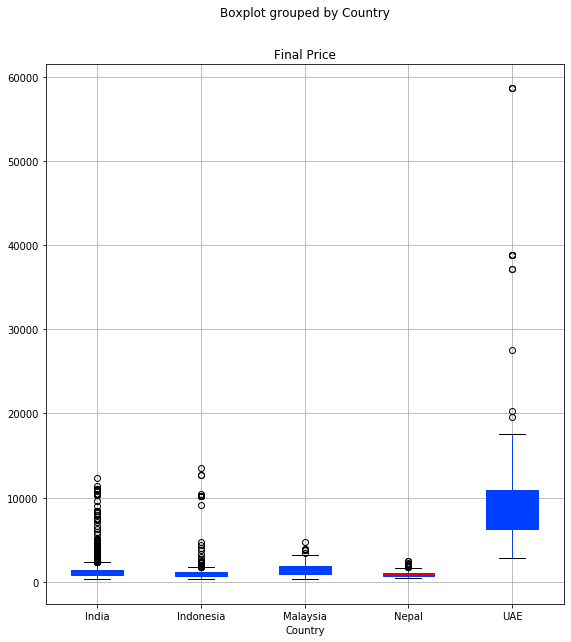

In [120]:
fig, axes = plt.subplots(figsize = (9, 10), sharey=True)
oyo_df.boxplot('Final Price', by='Country', return_type='axes', ax=axes, patch_artist = True)
plt.show()